In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy

class TrainingConfig():
    def __init__(self, batch_size, n_epochs, learn_rate):
        self.batch_size = batch_size
        self.n_epochs = n_epochs
        self.learn_rate = learn_rate
    
class TrainingResults():
    def __init__(self, losses=[], batches=[], valid_acc=[], train_acc=[]):
        self.losses = losses
        self.batches = batches
        self.valid_acc = valid_acc
        self.train_acc = train_acc
        

def load_archive(fname):
    try:
        with open (fname, 'rb') as fp:
            fields = pickle.load(fp)
            config = TrainingConfig(fields['batch_size'], fields['n_epochs'], fields['learn_rate'])
            results = TrainingResults(fields['losses'], fields['batches'], fields['valid_acc'], fields['train_acc'])
            return config, results
    except FileNotFoundError:
        return None


def plot_train_results(results_list, archive_list):
    f, plots = plt.subplots(3,1,figsize=(20,20))
    
    loss_plot = plots[0]
    loss_log_plot = plots[1]
    acc_plot = plots[2]
    
    for results, color, archive in zip(results_list, ['g', 'r', 'b', 'y', 'k', 'm', 'c', '0.75'], archive_list):
        archive_name = archive.partition('/')[-1].rpartition('/')[0]
        #print("archive: {} - color={}".format(archive_name, color))
        loss_plot.set_title('Loss')
        loss_plot.plot(results.batches, results.losses, color)
        loss_plot.set_xlim([results.batches[0], results.batches[-1]])
        loss_plot.set_ylim([results.losses[-1], results.losses[2]])     # Skip the first two losses

        loss_log_plot.set_title('Loss (log)')
        loss_log_plot.semilogy(results.batches, results.losses, color)
        loss_log_plot.set_xlim([results.batches[2], results.batches[-1]]) # Skip the first two losses

        acc_plot.set_title('Validation Accuracy')
        #acc_plot.plot(results.batches, results.train_acc, color, label='Training Accuracy')
        acc_plot.plot(results.batches, results.valid_acc, color, label=archive_name)
        acc_plot.set_ylim([0, 1.0])
        acc_plot.set_xlim([results.batches[0], results.batches[-1]])
        acc_plot.legend(bbox_to_anchor=(1.05, 1), loc=2)
    plt.tight_layout()
    plt.show()

max accuracy: 0.9210884351849286 during batch #768 or 770 batches
max accuracy: 0.952834467147213 during batch #684 or 770 batches
max accuracy: 0.9587301584868745 during batch #532 or 630 batches
max accuracy: 0.9587301584868745 during batch #532 or 1395 batches
max accuracy: 0.9541950110945843 during batch #974 or 1100 batches
max accuracy: 0.9573696142691874 during batch #1083 or 1166 batches
max accuracy: 0.9689342403898433 during batch #858 or 1100 batches
max accuracy: 0.9673469388025417 during batch #899 or 1100 batches


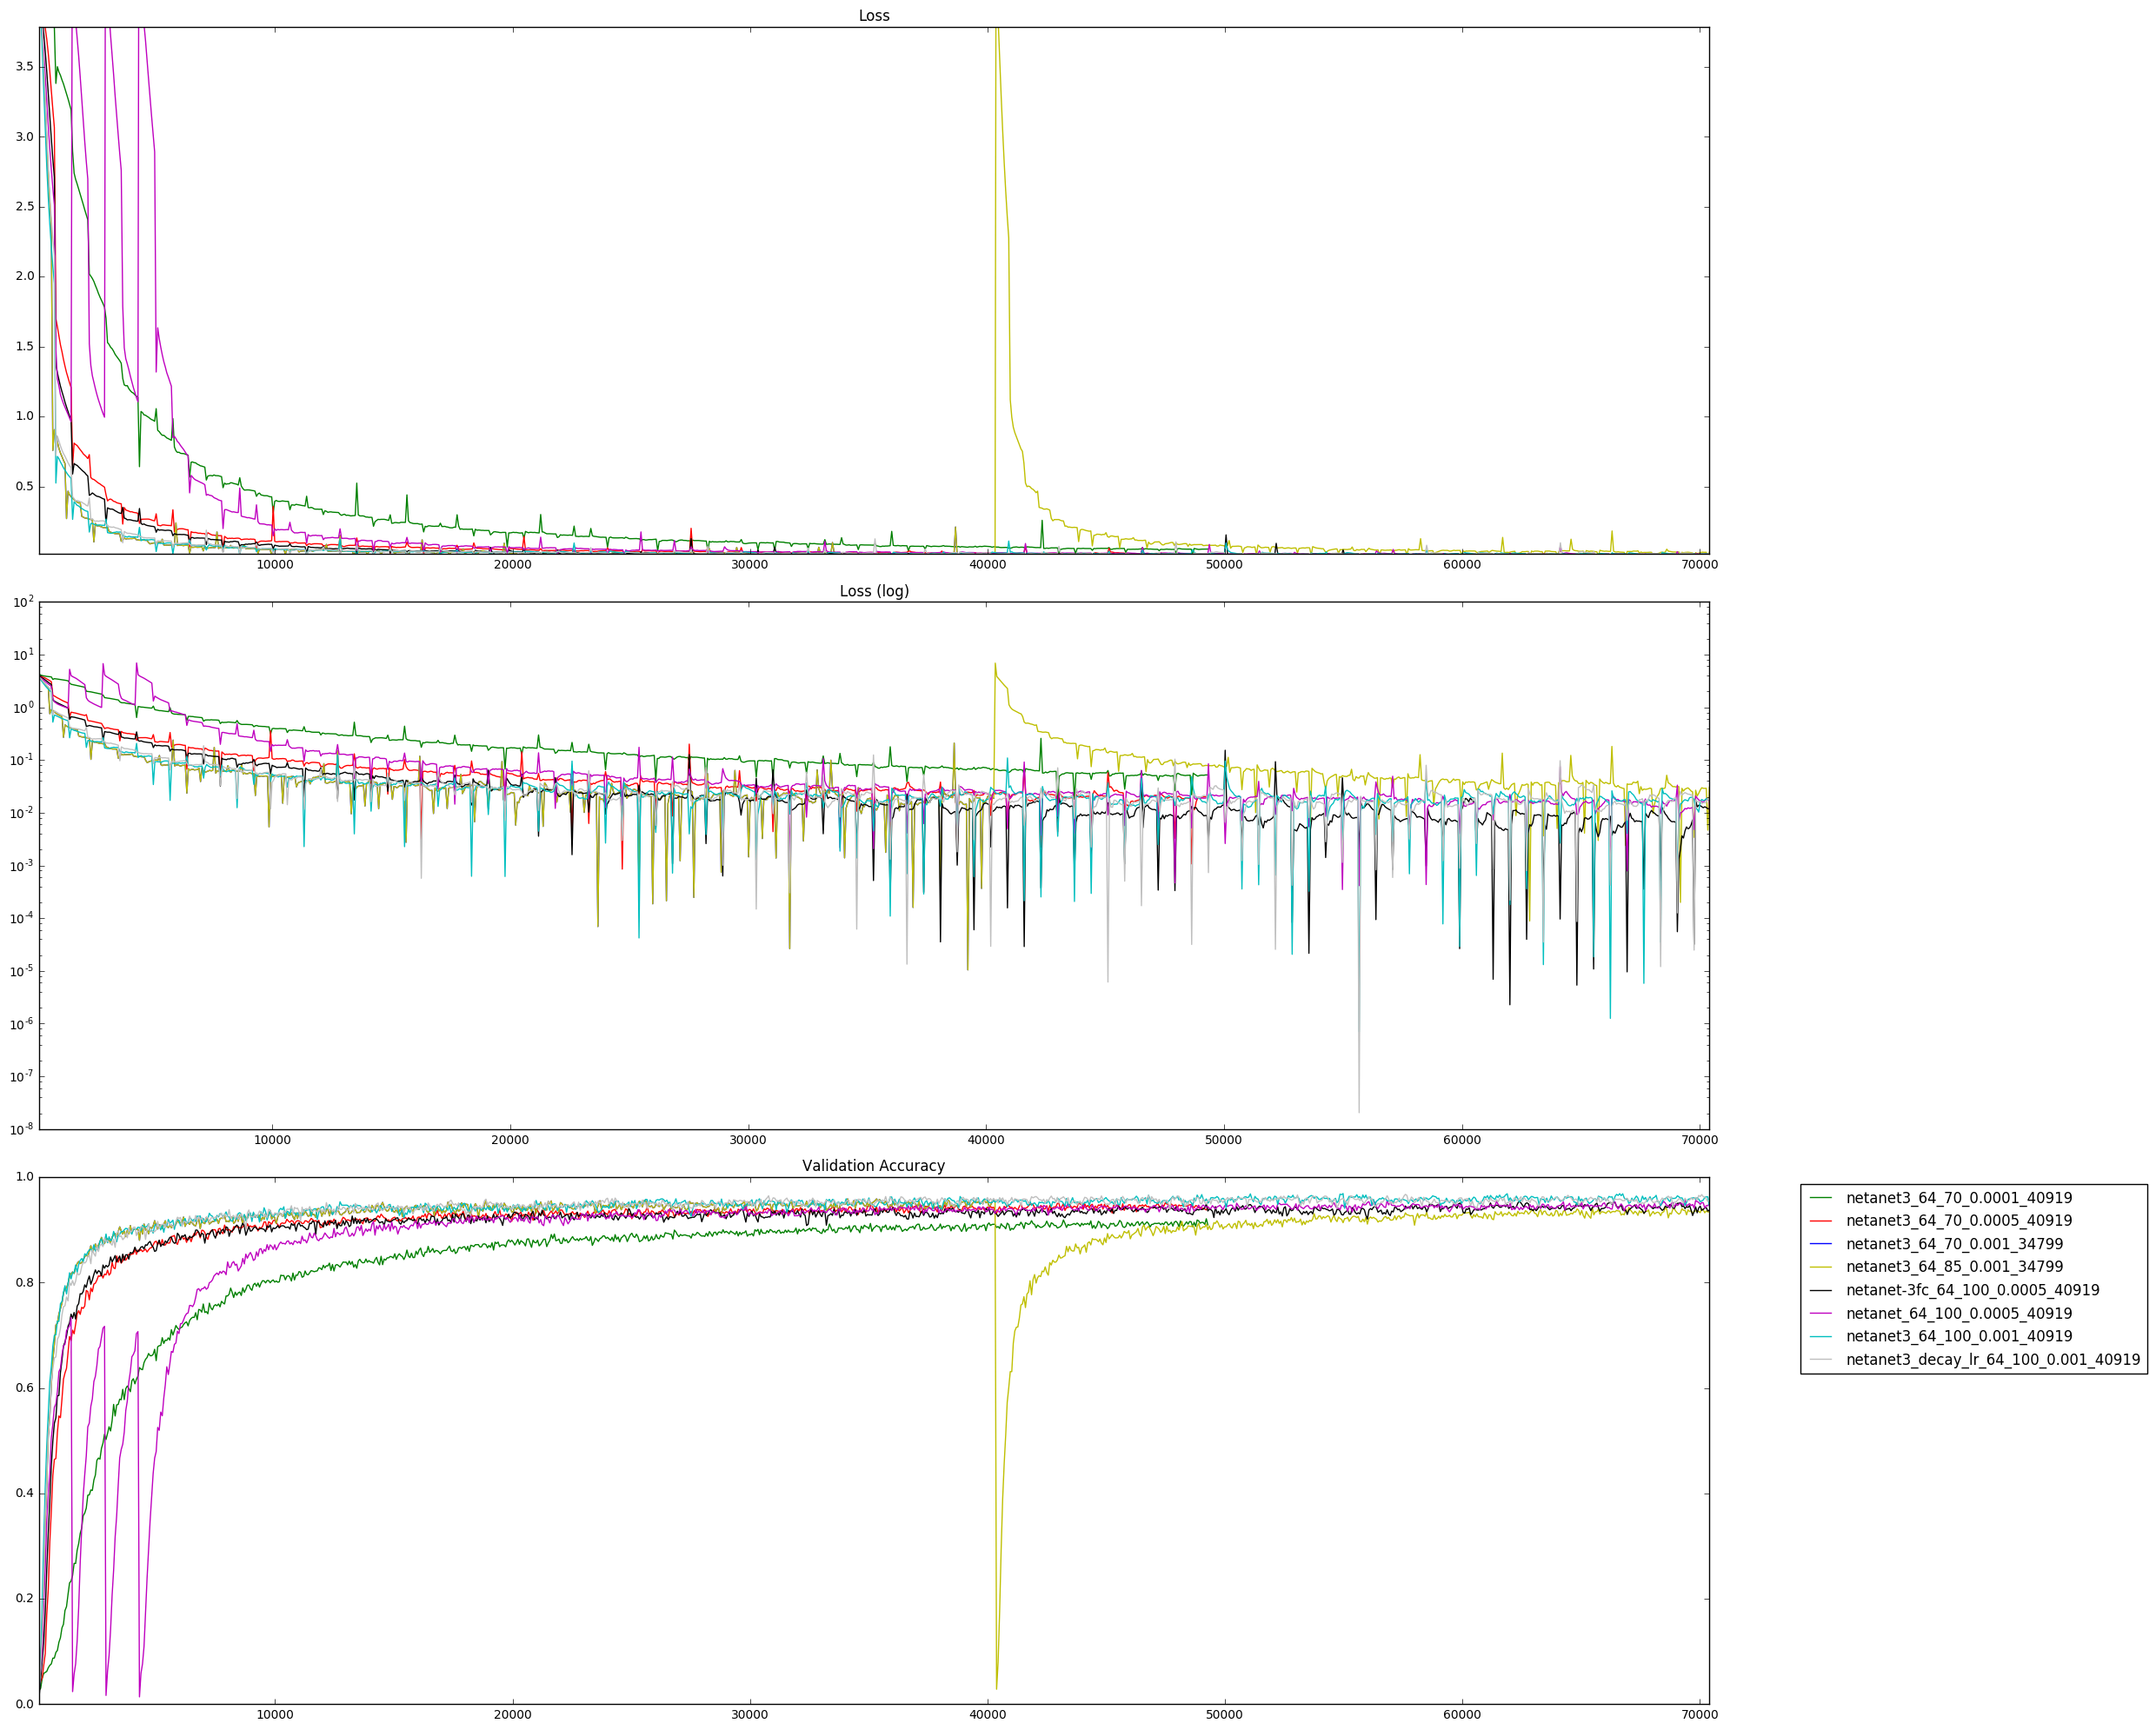

In [40]:
results_list = []
archive_list = []
for archive_name in ["results/netanet3_64_70_0.0001_40919/netanet3.stats", 
                     "results/netanet3_64_70_0.0005_40919/netanet3.stats",
                     "results/netanet3_64_70_0.001_34799/netanet3.stats", 
                     "results/netanet3_64_85_0.001_34799/netanet3.stats",
                     "results/netanet-3fc_64_100_0.0005_40919/netanet-3fc.stats",
                     "results/netanet_64_100_0.0005_40919/netanet.stats",
                     "results/netanet3_64_100_0.001_40919/netanet3.stats",
                     "results/netanet3_decay_lr_64_100_0.001_40919/netanet3_decay_lr.stats"]:
    config, results = load_archive(archive_name)
    results_list.append(results)
    archive_list.append(archive_name)
    print("max accuracy: {} during batch #{} or {} batches".format(
            max(results.valid_acc), 
            numpy.argmax(results.valid_acc), 
            len(results.valid_acc)))
    
plot_train_results(results_list, archive_list)

In [ ]:
/

results/netanet4_64_100_0.001_48359/netanet4.stats - max accuracy: 0.96 during batch #869 of 1200 batches total
results/netanet4_64_100_0.0005_48359/netanet4.stats - max accuracy: 0.96 during batch #1101 of 1200 batches total
results/netanet4_64_100_0.0001_48359/netanet4.stats - max accuracy: 0.94 during batch #1087 of 1200 batches total
results/netanet4_128_100_0.0005_48359/netanet4.stats - max accuracy: 0.95 during batch #272 of 300 batches total
./results/netanet4_256_100_0.0005_48359/netanet4.stats - max accuracy: 0.95 during batch #272 of 400 batches total
./results/netanet4_128_100_0.001_48359/netanet4.stats - max accuracy: 0.96 during batch #222 of 300 batches total
./results/netanet4-no-blur_128_100_0.0005_48359/netanet4-no-blur.stats - max accuracy: 0.96 during batch #288 of 300 batches total


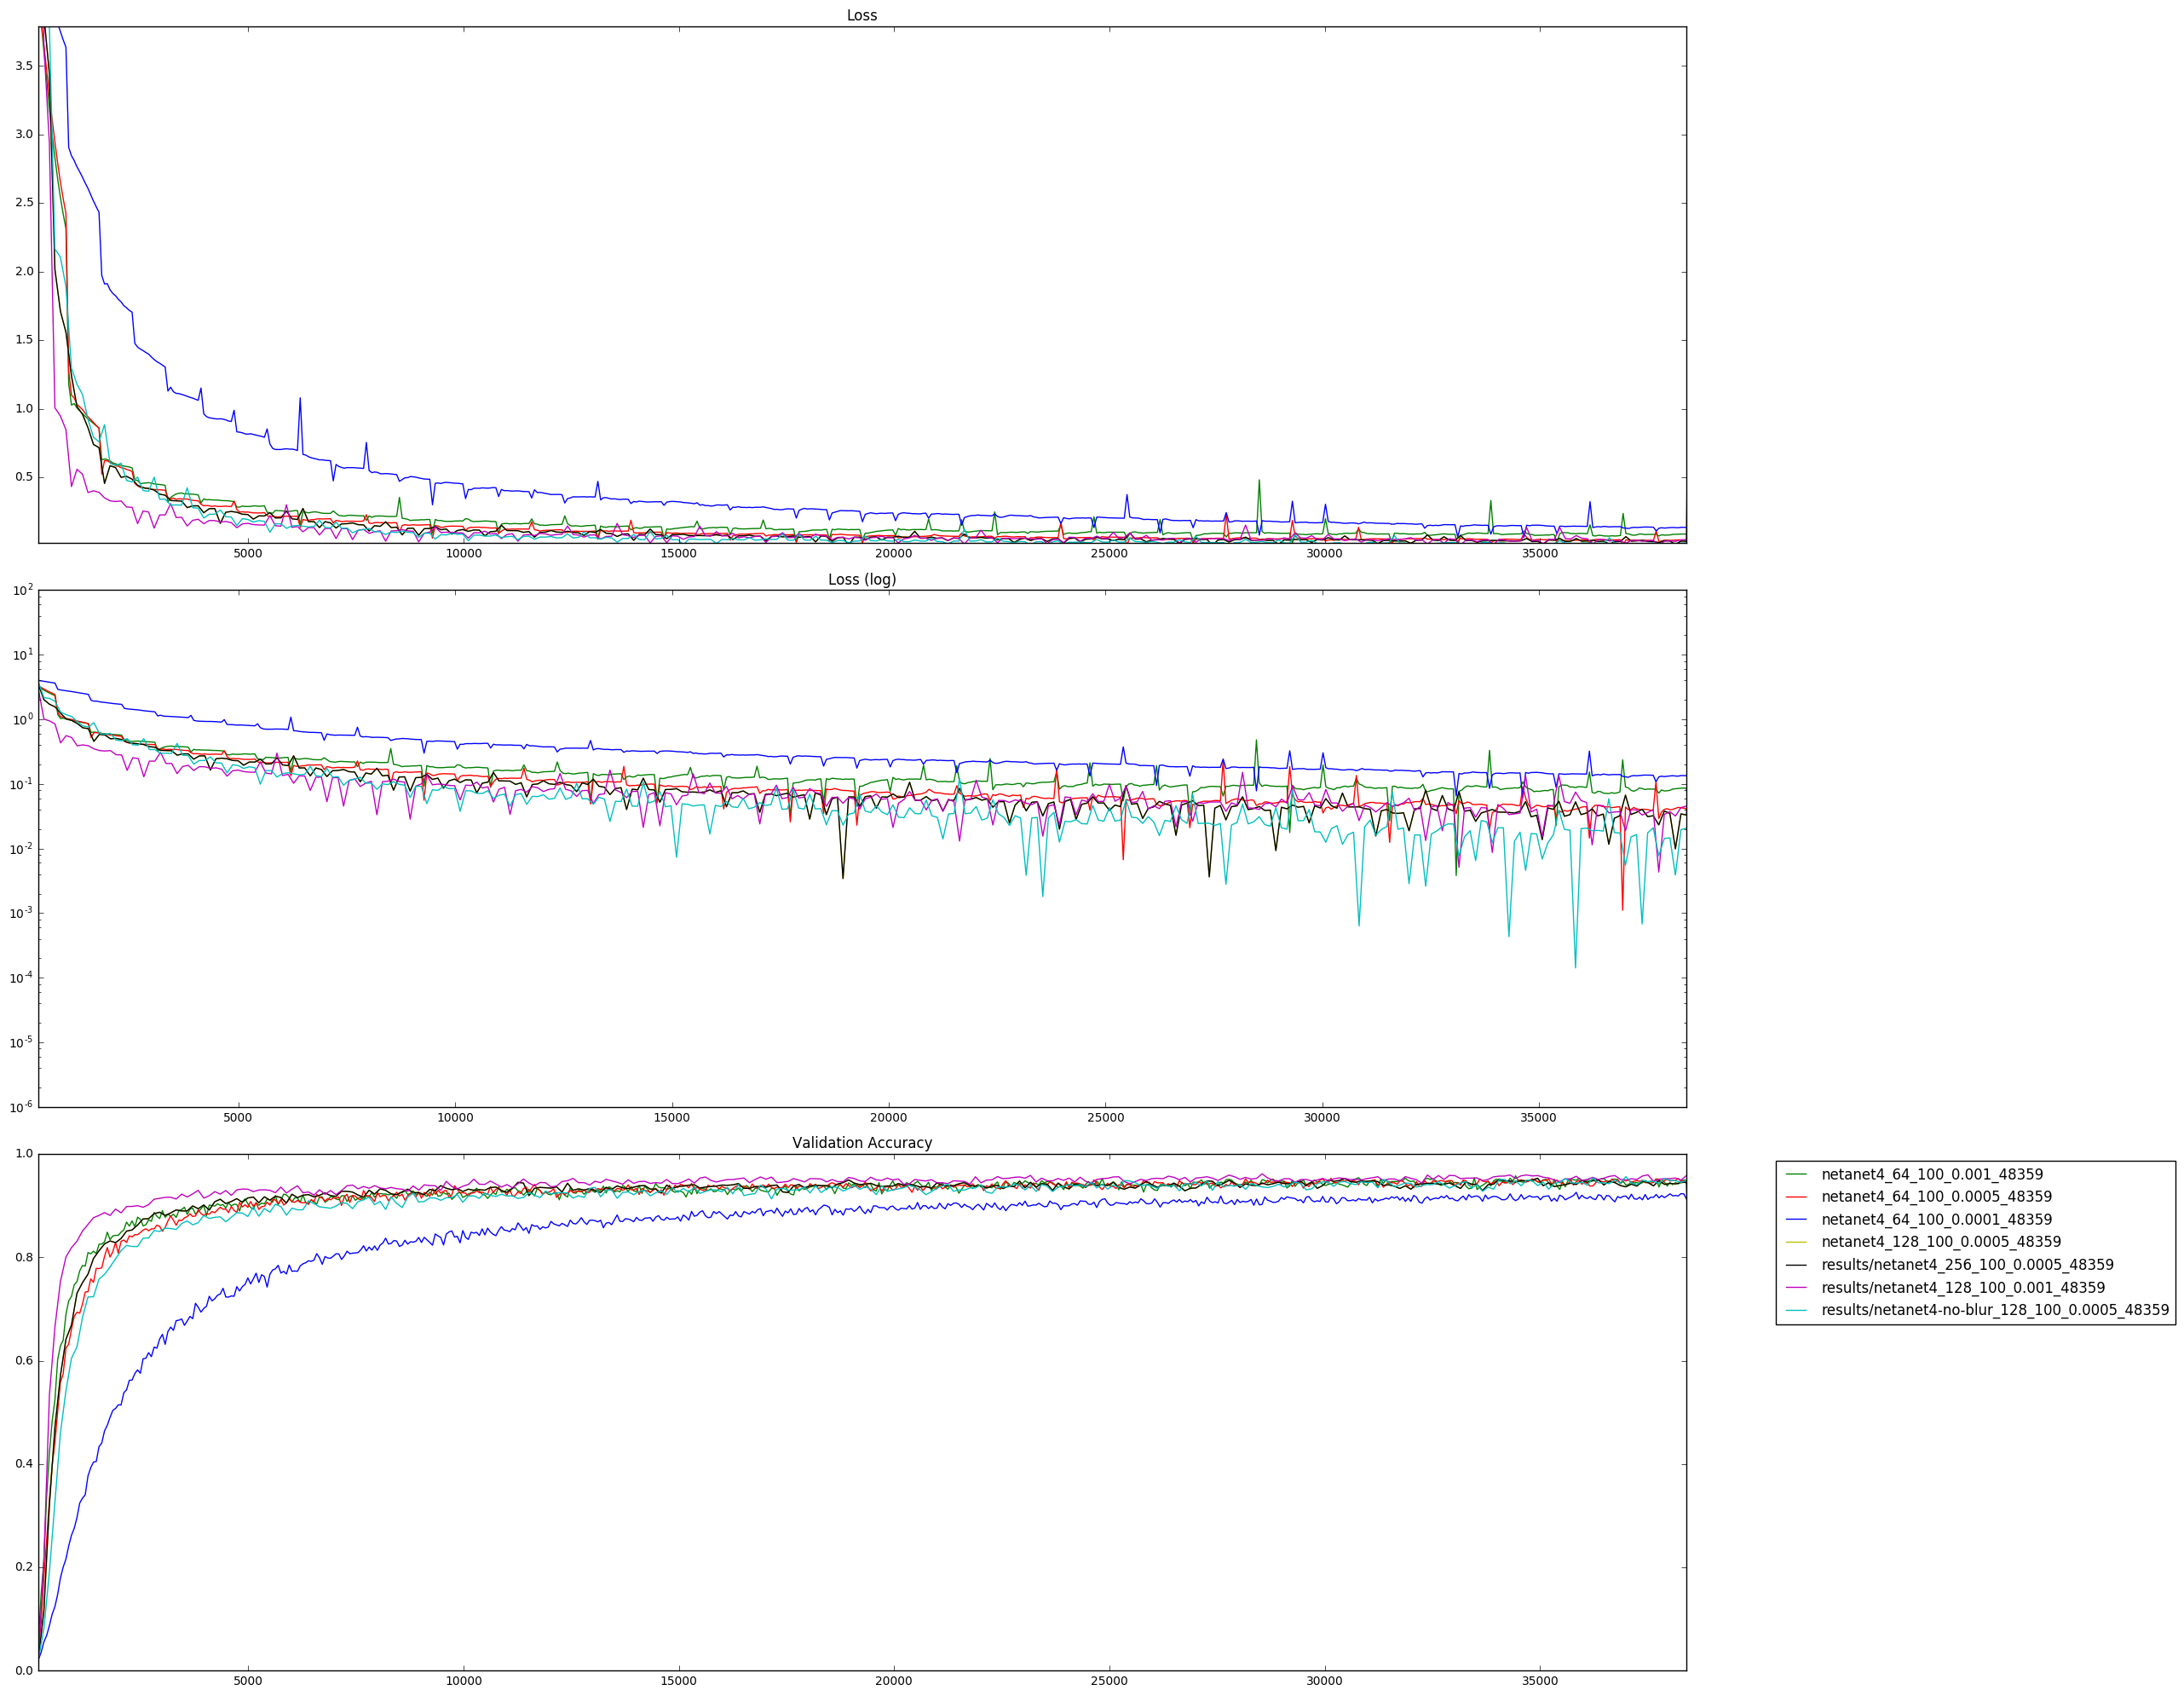

In [39]:
results_list = []
archive_list = []
for archive_name in ["results/netanet4_64_100_0.001_48359/netanet4.stats",
                     "results/netanet4_64_100_0.0005_48359/netanet4.stats",
                     "results/netanet4_64_100_0.0001_48359/netanet4.stats",
                     "results/netanet4_128_100_0.0005_48359/netanet4.stats",
                    "./results/netanet4_256_100_0.0005_48359/netanet4.stats",
                    "./results/netanet4_128_100_0.001_48359/netanet4.stats",
                    "./results/netanet4-no-blur_128_100_0.0005_48359/netanet4-no-blur.stats"]:
    config, results = load_archive(archive_name)
    results_list.append(results)
    archive_list.append(archive_name)
    print("{} - max accuracy: {:.2f} during batch #{} of {} batches total".format(
            archive_name,
            max(results.valid_acc), 
            numpy.argmax(results.valid_acc), 
            len(results.valid_acc)))
    
plot_train_results(results_list, archive_list)